In [1]:
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

# ANN model
import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('datasetbaru.csv')
df

,heart_health,Exercise,Heart_Disease,Sex,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,No,No,Female,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,No,Yes,Female,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Yes,No,Female,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Yes,Yes,Male,28.73,No,0.0,30.0,30.0,8.0
4,Good,No,No,Male,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Yes,No,Male,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Yes,No,Male,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,Yes,No,Female,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Yes,No,Male,23.73,No,3.0,30.0,12.0,0.0


# Overview Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   heart_health                  308854 non-null  object 
 1   Exercise                      308854 non-null  object 
 2   Heart_Disease                 308854 non-null  object 
 3   Sex                           308854 non-null  object 
 4   BMI                           308854 non-null  float64
 5   Smoking_History               308854 non-null  object 
 6   Alcohol_Consumption           308854 non-null  float64
 7   Fruit_Consumption             308854 non-null  float64
 8   Green_Vegetables_Consumption  308854 non-null  float64
 9   FriedPotato_Consumption       308854 non-null  float64
dtypes: float64(5), object(5)
memory usage: 23.6+ MB


In [4]:
df.describe()

,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,28.626211,5.096366,29.835200,15.110441,6.296616
std,6.522323,8.199763,24.875735,14.926238,8.582954
min,12.020000,0.000000,0.000000,0.000000,0.000000
25%,24.210000,0.000000,12.000000,4.000000,2.000000
50%,27.440000,1.000000,30.000000,12.000000,4.000000
75%,31.850000,6.000000,30.000000,20.000000,8.000000
max,99.330000,30.000000,120.000000,128.000000,128.000000


In [5]:
df.describe(exclude=np.number)

,heart_health,Exercise,Heart_Disease,Sex,Smoking_History
count,308854,308854,308854,308854,308854
unique,5,2,2,2,2
top,Very Good,Yes,No,Female,No
freq,110395,239381,283883,160196,183590


# Preprocessing data

In [6]:
df.isnull().sum()

,0
heart_health,0
Exercise,0
Heart_Disease,0
Sex,0
BMI,0
Smoking_History,0
Alcohol_Consumption,0
Fruit_Consumption,0
Green_Vegetables_Consumption,0
FriedPotato_Consumption,0


In [7]:
df.heart_health.unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [8]:
# check duplicate data
df.duplicated().sum()

4663

In [9]:
# handle duplicate data
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

# Cleansing data

In [10]:
df['heart_health'] = df['heart_health'].replace('Excellent', 'Good').replace('Very Good', 'Good')
df

<ipython-input-10-3391bcf47ba6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heart_health'] = df['heart_health'].replace('Excellent', 'Good').replace('Very Good', 'Good')


,heart_health,Exercise,Heart_Disease,Sex,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,No,No,Female,14.54,Yes,0.0,30.0,16.0,12.0
1,Good,No,Yes,Female,28.29,No,0.0,30.0,0.0,4.0
2,Good,Yes,No,Female,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Yes,Yes,Male,28.73,No,0.0,30.0,30.0,8.0
4,Good,No,No,Male,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
308849,Good,Yes,No,Male,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Yes,No,Male,21.48,No,8.0,15.0,60.0,4.0
308851,Good,Yes,No,Female,24.69,Yes,4.0,40.0,8.0,4.0
308852,Good,Yes,No,Male,23.73,No,3.0,30.0,12.0,0.0


In [11]:
df

,heart_health,Exercise,Heart_Disease,Sex,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,No,No,Female,14.54,Yes,0.0,30.0,16.0,12.0
1,Good,No,Yes,Female,28.29,No,0.0,30.0,0.0,4.0
2,Good,Yes,No,Female,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Yes,Yes,Male,28.73,No,0.0,30.0,30.0,8.0
4,Good,No,No,Male,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
308849,Good,Yes,No,Male,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Yes,No,Male,21.48,No,8.0,15.0,60.0,4.0
308851,Good,Yes,No,Female,24.69,Yes,4.0,40.0,8.0,4.0
308852,Good,Yes,No,Male,23.73,No,3.0,30.0,12.0,0.0


In [12]:
df['heart_health'].value_counts()

,count
heart_health,
Good,257209
Fair,35665
Poor,11317


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304191 entries, 0 to 308853
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   heart_health                  304191 non-null  object 
 1   Exercise                      304191 non-null  object 
 2   Heart_Disease                 304191 non-null  object 
 3   Sex                           304191 non-null  object 
 4   BMI                           304191 non-null  float64
 5   Smoking_History               304191 non-null  object 
 6   Alcohol_Consumption           304191 non-null  float64
 7   Fruit_Consumption             304191 non-null  float64
 8   Green_Vegetables_Consumption  304191 non-null  float64
 9   FriedPotato_Consumption       304191 non-null  float64
dtypes: float64(5), object(5)
memory usage: 25.5+ MB


In [14]:
df.describe()

,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,304191.000000,304191.000000,304191.000000,304191.00000,304191.000000
mean,28.652109,5.157431,29.722766,15.06082,6.337886
std,6.549566,8.233896,24.936570,14.96096,8.629462
min,12.020000,0.000000,0.000000,0.00000,0.000000
25%,24.210000,0.000000,12.000000,4.00000,2.000000
50%,27.460000,1.000000,30.000000,12.00000,4.000000
75%,31.890000,6.000000,30.000000,20.00000,8.000000
max,99.330000,30.000000,120.000000,128.00000,128.000000


# One hot encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk setiap variabel non-numerik
non_numeric_variables = ['heart_health', 'Exercise', 'Heart_Disease',
                         'Sex', 'Smoking_History']
for var in non_numeric_variables:
    df[var] = label_encoder.fit_transform(df[var])

# Menampilkan DataFrame setelah label encoding
df

<ipython-input-15-a39b47fb74d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = label_encoder.fit_transform(df[var])
<ipython-input-15-a39b47fb74d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = label_encoder.fit_transform(df[var])
<ipython-input-15-a39b47fb74d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,heart_health,Exercise,Heart_Disease,Sex,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,2,0,0,0,14.54,1,0.0,30.0,16.0,12.0
1,1,0,1,0,28.29,0,0.0,30.0,0.0,4.0
2,1,1,0,0,33.47,0,4.0,12.0,3.0,16.0
3,2,1,1,1,28.73,0,0.0,30.0,30.0,8.0
4,1,0,0,1,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
308849,1,1,0,1,29.05,0,4.0,30.0,8.0,0.0
308850,0,1,0,1,21.48,0,8.0,15.0,60.0,4.0
308851,1,1,0,0,24.69,1,4.0,40.0,8.0,4.0
308852,1,1,0,1,23.73,0,3.0,30.0,12.0,0.0


# Feature Selection

In [16]:
#feature selection data and split data
X = df.drop(columns='heart_health')
y = df.heart_health

In [17]:
X

,Exercise,Heart_Disease,Sex,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,0,14.54,1,0.0,30.0,16.0,12.0
1,0,1,0,28.29,0,0.0,30.0,0.0,4.0
2,1,0,0,33.47,0,4.0,12.0,3.0,16.0
3,1,1,1,28.73,0,0.0,30.0,30.0,8.0
4,0,0,1,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
308849,1,0,1,29.05,0,4.0,30.0,8.0,0.0
308850,1,0,1,21.48,0,8.0,15.0,60.0,4.0
308851,1,0,0,24.69,1,4.0,40.0,8.0,4.0
308852,1,0,1,23.73,0,3.0,30.0,12.0,0.0


In [18]:
y

,heart_health
0,2
1,1
2,1
3,2
4,1
...,...
308849,1
308850,0
308851,1
308852,1


# Feature Scalling

In [19]:
from sklearn.preprocessing import RobustScaler
# Daftar variabel yang akan dilakukan penskalaan
variables_to_scale = ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption',
                      'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Membuat objek
scaler = RobustScaler()

# Melakukan penskalaan untuk setiap variabel
df[variables_to_scale] = scaler.fit_transform(df[variables_to_scale])
df

<ipython-input-19-2a96e72b4291>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variables_to_scale] = scaler.fit_transform(df[variables_to_scale])


,heart_health,Exercise,Heart_Disease,Sex,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,2,0,0,0,-1.682292,1,-0.166667,0.000000,0.2500,1.333333
1,1,0,1,0,0.108073,0,-0.166667,0.000000,-0.7500,0.000000
2,1,1,0,0,0.782552,0,0.500000,-1.000000,-0.5625,2.000000
3,2,1,1,1,0.165365,0,-0.166667,0.000000,1.1250,0.666667
4,1,0,0,1,-0.402344,1,-0.166667,-1.222222,-0.5000,-0.666667
...,...,...,...,...,...,...,...,...,...,...
308849,1,1,0,1,0.207031,0,0.500000,0.000000,-0.2500,-0.666667
308850,0,1,0,1,-0.778646,0,1.166667,-0.833333,3.0000,0.000000
308851,1,1,0,0,-0.360677,1,0.500000,0.555556,-0.2500,0.000000
308852,1,1,0,1,-0.485677,0,0.333333,0.000000,0.0000,-0.666667


In [20]:
X = df.drop(columns='heart_health')
y = df.heart_health

from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

print("Jumlah data training:", len(X_train))
print("Jumlah data validasi:", len(X_val))
print("Jumlah data test:", len(X_test))

Jumlah data training: 232705
Jumlah data validasi: 41066
Jumlah data test: 30420


In [21]:
print(X_train_val.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(X_test.shape)

(273771, 9)
(232705, 9)
(41066, 9)
(30420, 9)
(30420, 9)


# ANN

In [22]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)), #input layer
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])

scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(
    loss=scce,
    optimizer=optimizer,
    metrics=['accuracy']
)
model.summary() # loss ='categorical_crossentropy', sparse_categorical_crossentropy, binary_crossentropy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,243 (102.51 KB)

 Trainable params: 26,243 (102.51 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode = 'min', restore_best_weights=True)
import tensorflow as tf
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/100
7273/7273 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8410 - loss: 0.5200 - val_accuracy: 0.8442 - val_loss: 0.4546
Epoch 2/100
7273/7273 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8465 - loss: 0.4591 - val_accuracy: 0.8443 - val_loss: 0.4523
Epoch 3/100
7273/7273 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8463 - loss: 0.4555 - val_accuracy: 0.8442 - val_loss: 0.4524
Epoch 4/100
7273/7273 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8457 - loss: 0.4538 - val_accuracy: 0.8441 - val_loss: 0.4509
Epoch 5/100
7273/7273 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8469 - loss: 0.4511 - val_accuracy: 0.8443 - val_loss: 0.4506
Epoch 6/100
7273/7273 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8463 - loss: 0.4521 - val_accuracy: 0.8444 - val_loss: 0.4507
Epoch 7/100
7273/7273 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8451 - loss: 0.4530 - val_accuracy: 0.8444 - val_loss: 0.4506
Epoch 8/100
7273/7273 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8459 -

In [24]:
# Simpan model ke file dengan format .keras
model.save('model_ann.keras')

# Evaluasi Model

In [25]:
evaluation = model.evaluate(X_test, y_test)

951/951 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8478 - loss: 0.4422


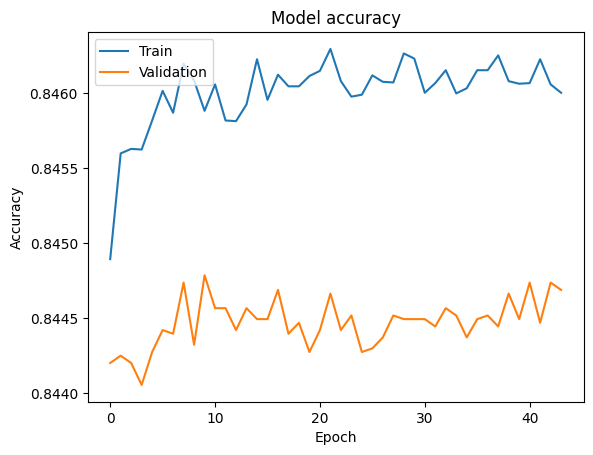

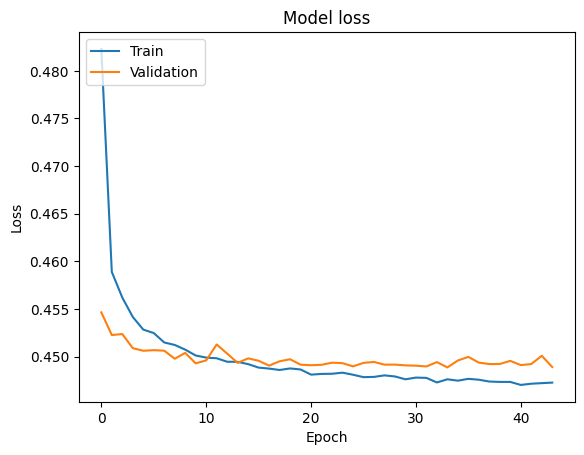

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [27]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

951/951 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([1, 1, 1, ..., 1, 1, 1])

In [28]:
print("Evaluation model ann:")
print("Accuracy:", accuracy_score(y_test, y_pred))

Evaluation model ann:
Accuracy: 0.8493425378040763


In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.02      0.04      3543
           1       0.85      1.00      0.92     25810
           2       0.71      0.00      0.01      1067

    accuracy                           0.85     30420
   macro avg       0.65      0.34      0.32     30420
weighted avg       0.79      0.85      0.79     30420



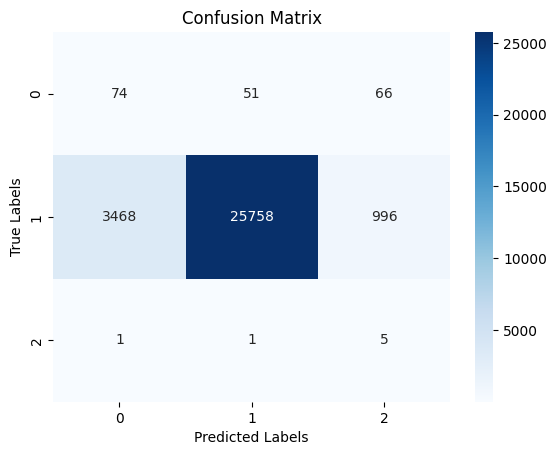

In [30]:
# Create the confusion matrix
confusion = confusion_matrix(y_pred, y_test)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")

# Set the axis labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Set the title
plt.title("Confusion Matrix")

# Display the plot
plt.show()